# IS 362 - Data Acquisiton and Management Project 2

Professor Charles Pak

Angela Hernandez

2/28/24

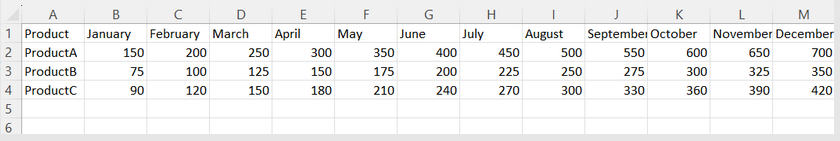

Your task is to:

(1) Choose any three of the “wide” datasets identified in the Week 5 Discussion items. (You may use your own dataset; please don’t use my Sample Post dataset, since that was used in your Project 1 assignment!) For each of the three chosen datasets:

    • Create a .CSV file (or optionally, a MySQL database!) that includes all of the information
    included in the dataset. You’re encouraged to use a “wide” structure similar to how the
    information appears in the discussion item, so that you can practice tidying and
    transformations as described below.
    • Read the information from your .CSV file into Python, and use pandas as needed to tidy
    and transform your data. [Most of your grade will be based on this step!]
    • Perform the analysis requested in the discussion item.
    • Your code should be in an Jupyter Notebook, posted to your GitHub repository, and
    should include narrative descriptions of your data cleanup work, analysis, and
    conclusions.

(2) Please include the URL for the Jupyter Notebook in your homework submission, for each of the three chosen datasets. You may create a single Jupyter Notebook, or three separate notebooks.


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("C:/Users/Jessie/Documents/IS 362/products.csv")

In [51]:
print(df.head())

    Product  January  February  March  April  May  June  July  August  \
0  ProductA      150       200    250    300  350   400   450     500   
1  ProductB       75       100    125    150  175   200   225     250   
2  ProductC       90       120    150    180  210   240   270     300   

   September  October  November  December  
0        550      600       650       700  
1        275      300       325       350  
2        330      360       390       420  


In [52]:
# function to map months to seasons
def month_to_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'

In [53]:
# Melt the data to long format
df_long = df.melt(id_vars=['Product'], var_name='Month', value_name='Sales')

In [54]:
# Apply the season mapping
df_long['Season'] = df_long['Month'].apply(month_to_season)

In [55]:
# Group by Product and Season, then calculate mean sales
seasonal_performance = df_long.groupby(['Product', 'Season'])['Sales'].mean().reset_index()

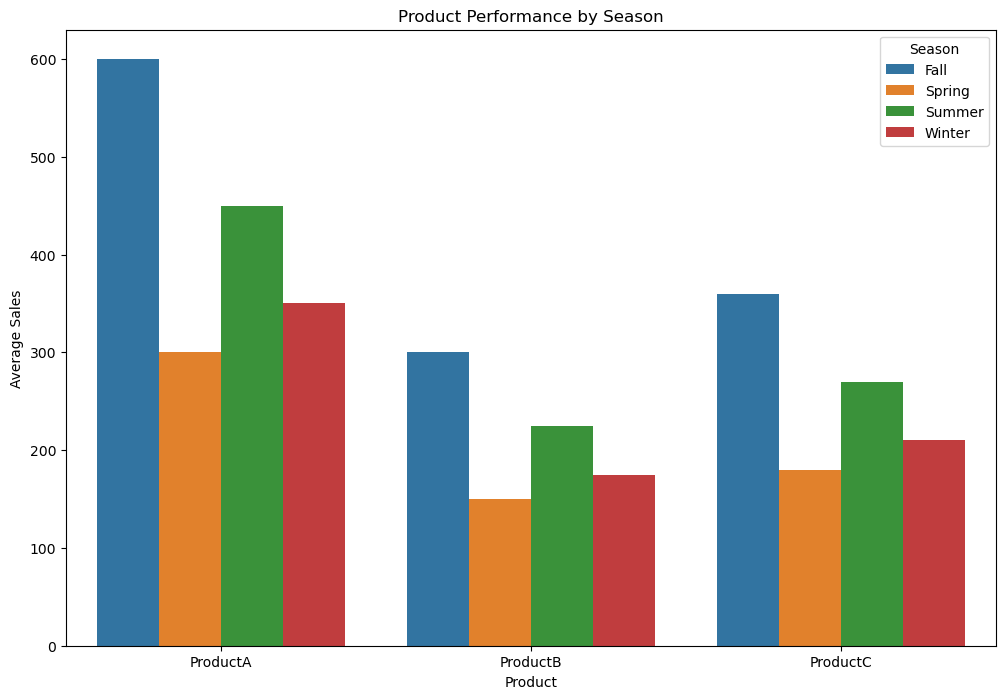

In [56]:
# Bar plot for visual comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Product', y='Sales', hue='Season', data=seasonal_performance)
plt.title('Product Performance by Season')
plt.ylabel('Average Sales')
plt.xlabel('Product')
plt.legend(title='Season')
plt.show()

# Conclusion

Based on the analysis perfoemed we can see that there is a clear variation in performance across different seasons for each product.  This indicates that seasonality impacts sales.  For Product A, the highest sales are in Fall, indicating that there is a strong seasonal demand during this period.  Product A also consistently outperforms ProductB and ProductC across all seasons.  Product B has the lowest sales figures among all three products across all seasons but follows a similar seasonal pattern to Product A with strong sales in Fall.  Product C falls in the middle in terms of sales performance, with sales peaking in Fall.  Product C shows more consistent performance in sales across all seasons compared to Product B.